In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import utils

train_data = '../data/train.csv'
test_data = '../data/test.csv'
log_path = '../results_2/'

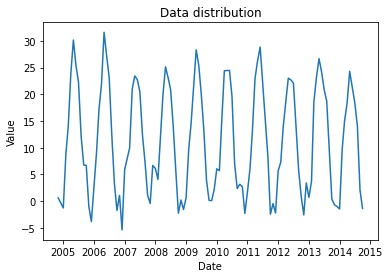

In [2]:
# Data Visualisation
f = open(train_data, 'r')
x, y = [], []

for line in f.readlines()[1:]:
    nums = line.strip().split(',')
    tokens = nums[0].split('/')
    x.append('/'.join(tokens))
    y.append(float(nums[1]))
f.close()

x = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in x]
x, y = zip(*sorted(zip(x, y)))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data distribution')
plt.show()

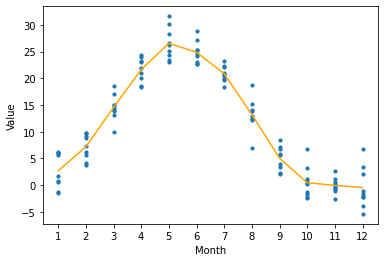

In [3]:
# For Scatter plots of data on the basis of month
x_mon = [xi.month for xi in x]
m_avg = [[] for i in range(12)]

for (m, y_out) in zip(x_mon, y):
    m_avg[m-1].append(y_out)
m_avg = [np.array(m).mean() for m in m_avg]

plt.scatter(x_mon, y, s=10)
plt.plot(range(1,13), m_avg, color='orange')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(range(1,13))
plt.show()

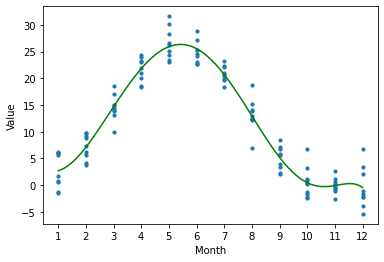

In [4]:
# For Plot of curve fitted on monthly data
wts_file = 'weights_1.txt'
f = open(os.path.join(log_path, wts_file), 'r')
x, fx = np.linspace(1, 12, 100), []

for line in f.readlines():
    y_out = utils.get_output_from_weights(x, line.strip())
    fx.append(y_out)
f.close()
fx = np.array(fx).reshape(-1)
plt.plot(x, fx, color='green')
plt.scatter(x_mon, y, s=10)
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(np.arange(1,13))
plt.show()

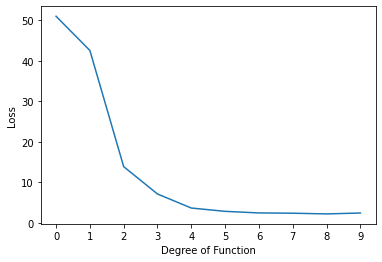

In [5]:
# For plot of loss v/s degree of function
loss_file = 'deg_loss.txt'
f = open(os.path.join(log_path, loss_file), 'r')
d, loss = [], []

for line in f.readlines():
    tokens = line.strip().split()
    d.append(int(tokens[1][:-1]))
    loss.append(float(tokens[-1]))

plt.plot(d, loss)
plt.xticks(range(len(d)))
plt.xlabel('Degree of Function')
plt.ylabel('Loss')
plt.show()